In [0]:
!pip install soundfile

In [0]:
import os
from scipy.io import wavfile
import numpy as np
import scipy
import scipy.signal
import soundfile as sf
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
from collections import namedtuple
import datetime
import time
from google.colab import drive
import h5py
import cv2
from PIL import Image, ImageOps

In [0]:
drive.mount('/content/drive')
os.chdir('/content/drive/') #connecting to google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
labelFile=("Shared drives/Stethoscope for the rainforests/Training data set /Table_13AB_v2.txt")
# reading the boxes and storing that information (not my code)
times = [] 
freqs = []
files = []
sonotypes = []
actTimes = []

with open(labelFile) as file:
  label_reader = csv.reader(file, delimiter='\t')
  for row in label_reader:
    # not use the first row
    if (not row[0].isnumeric()):
      continue

    # all the recording are either start at 0min or 30mins
    duration = float(row[4]) - float(row[3])
    timeWeight = [3600,60,1]
    actSta = sum([a*b for a,b in zip(timeWeight, map(int,row[10].replace('.',":").split(':')[:3]))])
    actEnd = actSta + duration

    fileName = row[7].split("\\")[-1]
    
    # get the start time of cur recording
    # 3B_20180607_070500_Dawn_Sunrise_Based.wav
    # or 20180908_060000_13A_24H [1.4452 116.9811].wav
    splName = fileName.split("_")

    # actual time is either in index 1 or 2 in splName
    if (len(splName[1]) == 6):
      strTime = splName[1]         
    elif (len(splName[2]) == 6):   
      strTime = splName[2]
    else: 
      print(row[0])
      continue  

    recLis = [int(strTime[0]) * 10 + int(strTime[1]),
              int(strTime[2]) * 10 + int(strTime[3]), 
              int(strTime[4]) * 10 + int(strTime[5])]    

    recSta = sum([a*b for a,b in zip(timeWeight, recLis)])

    # start, end time used to corp the specs
    start = actSta - recSta
    end = start + duration

    try:
      sonotypes.append(int(row[11]))
      times.append([start,end])
      actTimes.append([actSta, actEnd])
      freqs.append([float(row[5]), float(row[6])])
      files.append(fileName) 
    except:
      # selection number
      print(row[0])
      pass

print("dataset size:  %i" % len(times))    
print("filename sample: " + files[0])

print(files[len(files)-1])
print(actTimes[len(files)-1])
print(times[len(files)-1])

dataset size:  1651
filename sample: 3B_20180607_070500_Dawn_Sunrise_Based.wav
20190406_060000_13A_24H [1.4438 116.9805].wav
[23175, 23198.148843195988]
[1575, 1598.1488431959879]


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa.display
import math
fileDir = "Shared drives/Stethoscope for the rainforests/Sound data/EastKalimantan/13AB/"
mydir = "/content/drive/My Drive/Stethoscope/min-spectrogram/"


soundFiles = os.listdir(fileDir)
usedFiles = np.intersect1d(soundFiles, files)

#print(len(usedFiles))
#curFile="3B_20180607_070500_Dawn_Sunrise_Based.wav"


#Debug the issue of memory leak in the below code
for curFile in usedFiles[51:]:
  print("processing " + curFile)
  filePath=fileDir+curFile
  filename = curFile[:-4]
  y, sr = librosa.load(filePath)
  length_of_audio = librosa.get_duration(y=y, sr=sr)
  final_counter = math.floor(length_of_audio/60)
  for i in range(final_counter):
    y, sr = librosa.load(filePath, offset=60*i, duration=60)
    audio, _ = librosa.effects.trim(y)
    hop_length = 512
    n_fft = 2048
    D = np.abs(librosa.stft(audio, n_fft=n_fft,  
                        hop_length=hop_length))
    plt.figure()
    DB = librosa.amplitude_to_db(D, ref=np.max)
    librosa.display.specshow(DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='linear');
    plt.axis('off')
    plt.savefig(mydir + filename + "_" + str(i) + ".jpg", bbox_inches='tight',pad_inches = 0)
    plt.close()
    #plt.colorbar(format='%+2.0f dB');

processing 20190606_060400_Dawn_Sunrise_Based [13B_.4444 116.9808].wav
processing 20190606_174600_Dusk_SunsetBased [13B_.4444 116.9808].wav
processing 3B_20180607_070500_Dawn_Sunrise_Based.wav


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa.display
import math
fileDir = "Shared drives/Stethoscope for the rainforests/Sound data/EastKalimantan/13AB/"
mydir = "/content/drive/My Drive/Stethoscope/min-spectrogram/"


soundFiles = os.listdir(fileDir)
usedFiles = np.intersect1d(soundFiles, files)

#curFile="3B_20180607_070500_Dawn_Sunrise_Based.wav"

for curFile in usedFiles:
  filePath=fileDir+curFile
  y, sr = librosa.load(filePath)
  length_of_audio = librosa.get_duration(y=y, sr=sr)
  final_counter = math.floor(length_of_audio/60)
  for i in range(final_counter):
    print("processing " + curFile)
    y, sr = librosa.load(filePath, offset=60*i, duration=60) #offset=,duration=40
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,)
    plt.figure(figsize=(10, 6.67))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='linear', sr=sr
                          )
    filename = curFile[:-4]
    plt.savefig(mydir + filename + "_" + str(i) + ".jpg")
    plt.close()

In [0]:
# all the sound files
fileDir = "Shared drives/Stethoscope for the rainforests/Sound data/EastKalimantan/13AB/"
soundFiles = os.listdir(fileDir)
usedFiles = np.intersect1d(soundFiles, files)

for curFile in usedFiles:
  print("processing " + curFile)

  for i in range(len(files)):
    if(files[i] == curFile):
      startTime = times[i][0]
      duration = times[i][1] - startTime
      freqBox = freqs[i]

  filePath = fileDir + curFile
  y, sr = librosa.load(filePath,offset=startTime,duration=duration)
  S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,)
  plt.figure(figsize=(10, 4))
  S_dB = librosa.power_to_db(S, ref=np.max)
  librosa.display.specshow(S_dB, x_axis='time',
                          y_axis='linear', sr=sr
                          )
  plt.savefig("/content/drive/My Drive/Stethoscope/spectrogram/" + curFile + ".jpg")

processing 20180607_060400_Dawn_Sunrise____13B_.4455 116.9813].wav
processing 20180607_120400_Midday_Sunrise___13B_.4455 116.9813].wav


#Misc Code

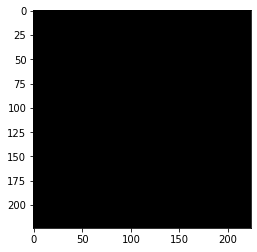

In [0]:
#trying to display a spectogram for a sample file
from scipy.fft import fftshift

fileDir = "Shared drives/Stethoscope for the rainforests/Sound data/EastKalimantan/13AB/"
soundFiles = os.listdir(fileDir)
#usedFiles = np.intersect1d(soundFiles, files)

curFile="3B_20180607_070500_Dawn_Sunrise_Based.wav"
filePath = fileDir + curFile
audio, rate = sf.read(filePath)
    # plot the spectrogram
freq, t, spec = scipy.signal.spectrogram(audio, rate)

# resize the image
specs_resized = []
freqs_updated = []
times_updated = []
sonotypes_updated = []

for i in range(len(files)):
    if(files[i] == curFile):
      boxTime = times[i]
      boxFreq = freqs[i]

      # get low and high freq index of the box
      low_freq = np.argmin(np.abs(freq - boxFreq[0]))
      high_freq = np.argmin(np.abs(freq - boxFreq[1]))
      # get start and end time of the box
      start = np.argmin(np.abs(t - boxTime[0]))
      end = np.argmin(np.abs(t - boxTime[1]))

      # adjust the params to cover the whole box
      # be aware of index out of bound
      if freq[low_freq] > boxFreq[0]: 
        low_freq = max(low_freq -1,0)

      if freq[high_freq] < boxFreq[1]: 
        high_freq = high_freq + 1

      if t[start] > boxTime[0]: 
        start = max(start - 1, 0)

      if t[end] < boxTime[1]: 
        start = start + 1

      specs[i] = spec[low_freq:high_freq, start:end]

      spec_resized=cv2.resize(specs[i],(224,224))
      spec_resized=cv2.cvtColor(spec_resized.astype('float32'), cv2.COLOR_BGR2RGB) #cv2 does not accept float64   
      specs_resized.append(np.flip(spec_resized,0))
      freqs_updated.append(freqs[i])
      times_updated.append(actTimes[i])
      sonotypes_updated.append(sonotypes[i])

plt.
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Reached EOF prematurely; finished at 158318592 bytes, expected 158318636 bytes from header.
  import sys


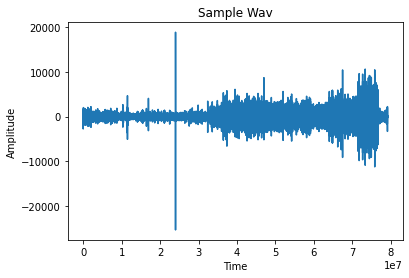

In [0]:
#miscalenous tried to display the data through a different manner
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

# read audio samples
input_data = read(filePath)#sample file
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

spec number: 0
(224, 224, 3)


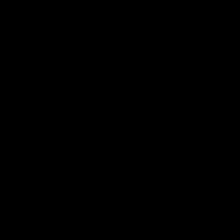

In [0]:
from google.colab.patches import cv2_imshow

#displaying a box for a corresponding spectogram
# compute the data for the spectrogram
fileDir = "Shared drives/Stethoscope for the rainforests/Sound data/EastKalimantan/13AB/"

#usedFiles = np.intersect1d(soundFiles, files)

curFile="3B_20180607_070500_Dawn_Sunrise_Based.wav"
filePath = fileDir + curFile
index=0
print("spec number: %d" % index)
ranFile = files[index]


ranFilePath=filePath
audio, rate = sf.read(ranFilePath)
freq, t, spec = scipy.signal.spectrogram(audio, rate)

# get low and high freq index of the box
boxTime = times[index]
boxFreq = freqs[index]

# get low and high freq index of the box
low_freq = np.argmin(np.abs(freq - boxFreq[0]))
high_freq = np.argmin(np.abs(freq - boxFreq[1]))
# get start and end time of the box
start = np.argmin(np.abs(t - boxTime[0]))
end = np.argmin(np.abs(t - boxTime[1]))

# adjust the params to cover the whole box
if freq[low_freq] > boxFreq[0]: 
  low_freq = low_freq -1

if freq[high_freq] < boxFreq[1]: 
  high_freq = high_freq + 1

if t[start] > boxTime[0]: 
  start = start - 1

if t[end] < boxTime[1]: 
  start = start + 1

boxSpecPlt = spec[low_freq:high_freq, start:end]
boxFreqPlt = freq[low_freq: high_freq]
boxTPlt = t[start:end]

spec_resized=cv2.resize(boxSpecPlt,(224,224))
spec_resized=cv2.cvtColor(spec_resized.astype('float32'), cv2.COLOR_BGR2RGB)

print(spec_resized.shape)
cv2_imshow(spec_resized)

# plot the spectrogram
# set up
#plt.figure(figsize=(15, 5))
#plt.xlabel('Time [sec]')
#plt.title("Spectrogram for a random box")


# plot
#.pcolormesh(boxTPlt, boxFreqPlt, boxSpecPlt)
#plt.colorbar()

3B_20180607_070500_Dawn_Sunrise_Based.wav
3421
59.995283446712016
8
3421
3B_20180607_070500_Dawn_Sunrise_Based.wav
446
63.9978231292517
8
3421
3B_20180607_070500_Dawn_Sunrise_Based.wav
285
65.99909297052154
8
3421
3B_20180607_070500_Dawn_Sunrise_Based.wav


KeyboardInterrupt: ignored

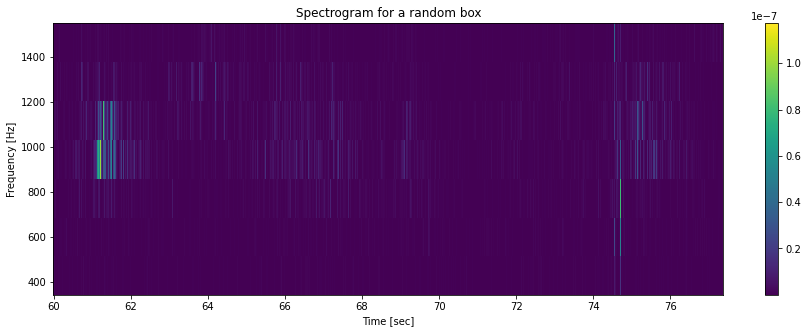

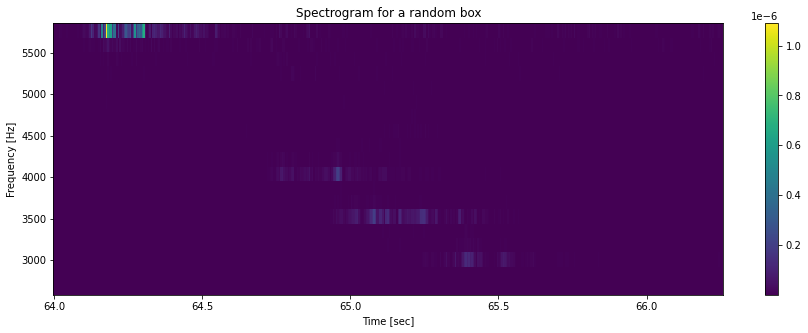

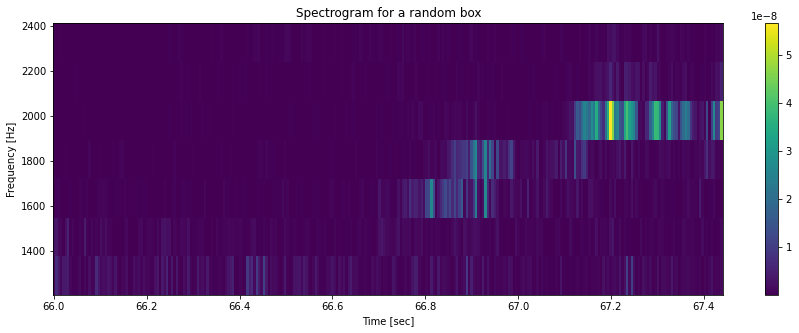

In [0]:
 #displaying all the boxes for 1 audio file.Each box is displayed in a different spectogram
 for i in range(len(files)):
    print(files[i])
    specs=[None]*len(times)
    if(files[i] == curFile):
      
      boxTime = times[i]
      boxFreq = freqs[i]
      audio, rate = sf.read(filePath)
      freq, t, spec = scipy.signal.spectrogram(audio, rate)

      # get low and high freq index of the box
      low_freq = np.argmin(np.abs(freq - boxFreq[0]))
      high_freq = np.argmin(np.abs(freq - boxFreq[1]))
      # get start and end time of the box
      start = np.argmin(np.abs(t - boxTime[0]))
      end = np.argmin(np.abs(t - boxTime[1]))

      # adjust the params to cover the whole box
      # be aware of index out of bound
      if freq[low_freq] > boxFreq[0]: 
        low_freq = max(low_freq -1,0)

      if freq[high_freq] < boxFreq[1]: 
        high_freq = high_freq + 1

      if t[start] > boxTime[0]: 
        start = max(start - 1, 0)

      if t[end] < boxTime[1]: 
        start = start + 1

      specs[i] = spec[low_freq:high_freq, start:end]
      boxFreqPlt = freq[low_freq: high_freq]
      boxTPlt = t[start:end]
      print(len(boxTPlt))
      print(boxTPlt[0])
      print(len(boxSpecPlt))
      print(len(boxSpecPlt[0]))

      plt.figure(figsize=(15, 5))
      plt.ylabel('Frequency [Hz]')
      plt.xlabel('Time [sec]')
      plt.title("Spectrogram for a random box")

# plot
      plt.pcolormesh(boxTPlt, boxFreqPlt, specs[i])
      plt.colorbar()
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: WavFileWarning: Reached EOF prematurely; finished at 158318592 bytes, expected 158318636 bytes from header.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: WavFileWarning: Reached EOF prematurely; finished at 158318592 bytes, expected 158318636 bytes from header.


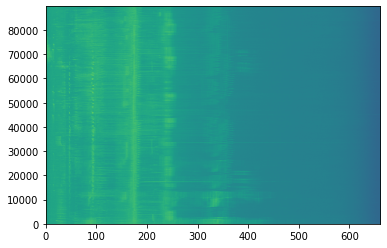

In [0]:
from scipy.io import wavfile
from scipy import signal
import numpy as np

sample_rate, audio = wavfile.read(filePath)
freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate)
def log_specgram(audio, sample_rate, window_size=30,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, np.log(spec.T.astype(np.float32) + eps)
sample_rate,audio=wavfile.read(filePath)

_, spectrogram = log_specgram(audio, sample_rate)
    
plt.imshow(spectrogram, aspect='auto', origin='lower')
#plt.pcolormesh(times, freqs, (spec))